# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('C:/data/human_body_temperature.csv')
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


(array([ 2.,  0.,  3.,  2.,  3.,  4.,  7.,  7., 12., 11., 13., 14., 13.,
        18.,  2.,  8.,  5.,  3.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 96.3 ,  96.48,  96.66,  96.84,  97.02,  97.2 ,  97.38,  97.56,
         97.74,  97.92,  98.1 ,  98.28,  98.46,  98.64,  98.82,  99.  ,
         99.18,  99.36,  99.54,  99.72,  99.9 , 100.08, 100.26, 100.44,
        100.62, 100.8 ]),
 <a list of 25 Patch objects>)

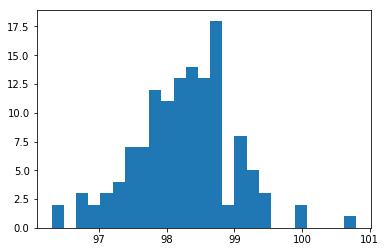

In [4]:
#Question 1
plt.hist(df['temperature'], bins = 25)
#The distibution by eye doesn't perfectly model a normal distribution, yet since the number of obervations n = 130 
#is greater than 30, the distribution can be considered to follow a normal distribution. 

In [5]:
#Question 2
#We've already discussed that the sample size is large enough to meet the condition n > 30,
#in addition its observations can be considered independent because the sample of n = 130 is 
#less than 10% of the total population, which is the criteria for seperate observations in a 
#sample to be considered independent. 

In [6]:
#Question 3 - Bootstrap Sample
#Running this simulation over and over again results in values typically between 98.1-98.3 deg
x = df['temperature']
y = []
for i in x:
    y.append(np.random.choice(x))
print("A boostrap sample of the data shows the mean temperatrure is:", sum(y)/len(y))

A boostrap sample of the data shows the mean temperatrure is: 98.2361538461539


In [7]:
#In a One Sample test, we will have our null hypothesis = The average human temperature is 98.6 degrees. 
#Our Alternative Hypothesis is that the average human temperature is NOT 98.6 degrees.
#We will start with a z test because the sample size is larger than 30, which is the preferred
#case for using a z test. 
mean = x.mean()
std = x.std()
n = x.count()
sigma = std/(n**.5)
mean, std, n, sigma

(98.24923076923075, 0.7331831580389456, 130, 0.06430441683789102)

In [8]:
z = (98.6 - mean)/sigma
print(z)
import scipy.stats as stats
val = (1 - stats.norm.cdf(z)) * 2 
print("For a z test the p value is: " ,val)
#This low p value indicates that the null hypothesis should be rejected and that the average human body temperature
#isn't 98.6 degrees, we will also perform a t test. 

5.4548232923645195
For a z test the p value is:  4.902157013653152e-08


In [16]:
#T test
t = z
p_Ttest = (1 - stats.t.cdf(t, len(df) -1)) * 2
print("For a t test the p value is: ", p_Ttest)
#This value is also extremely small, so the null hypothesis can be rejected. The mean body temperature
#is NOT 98.6 degrees. 

For a t test the p value is:  2.4106320428707306e-07


In [25]:
#Question 4
#Creating sample of 10 and getting relavant values
small_sample = y[:10]
s = pd.Series(small_sample)
mean_s = s.mean()
std_s = s.std()
n_s = s.count()
sigma_s = std_s/(n_s**.5)
mean_s, std_s, n_s, sigma_s

(98.19000000000001, 0.6887186169498629, 10, 0.21779194965226148)

In [26]:
new_z = (98.5 - mean_s)/sigma_s
new_z

1.4233767616064368

In [29]:
new_val = (1 - stats.norm.cdf(new_z)) * 2 
print("With a sample of 10, a z test gives a p value of: ", new_val)

With a sample of 10, a z test gives a p value of:  0.15462696533364606


In [32]:
new_t = new_z
new_t_val = (1 - stats.t.cdf(new_t, len(s)-1))
print("With a sample of 10, a t test gives a p value of: ", new_t_val)

With a sample of 10, a t test gives a p value of:  0.09417754986034543


In [33]:
#Both tests produce rather high p values compared to the previous tests. 
#In both of these situations we would fail to reject the null hypothesis 
#The t - test is more applicable in this situation since it is closer to our previous tested values
#It is also a general practice to use the t - test when working with smaller samples

In [37]:
#Question 5
#We will create a 95% confidence interval and assume anything out of this range is considered abnormal
#Using our z test and values from earlier 
mean, sigma, std

(98.24923076923075, 0.06430441683789102, 0.7331831580389456)

In [38]:
#A Z score of 1.96 (approximately) corresponds to a 95% confidence interval, therefore:
#Note: I am using std instead of sigma because we are using n = 1 case in this assumption, also if n = 1 then std = sigma
lower = mean - std*1.96
higher = mean + std*1.96
confidence_int = (lower, higher)
print("Human body temperature is considered abnormal if it is not in the range: ", confidence_int)

Human body temperature is considered abnormal if it is not in the range:  (96.81219177947442, 99.68626975898708)


In [63]:
F = df[df['gender'] == 'F']
M = df[df['gender'] == 'M']
f_temp = F['temperature']
m_temp = M['temperature']
f_mean = f_temp.mean()
m_mean = m_temp.mean()
f_std = f_temp.std()
m_std = m_temp.std()

In [66]:
diff_of_means = f_mean - m_mean
diff_sigma = ((f_std**2)/len(f_temp) + (m_std**2)/len(m_temp)) ** .5
diff_of_means, diff_sigma

(0.2892307692307696, 0.12655395041982645)

In [68]:
#Now that we have relevant variables we will define
#Null hypothesis: Men and Female body temperature is the same
#Alternative hypothesis: Men and Female body temperature is NOT the same
#Significance level of 0.05
z = diff_of_means/diff_sigma
z

2.2854345381656103

In [71]:
MWPVal = (1 - stats.norm.cdf(z))*2
print("For this test, the p value is: ", MWPVal)


For this test, the p value is:  0.022287360760657515


In [ ]:
#Since p < 0.05, we can reject the null hypothesis and say that men and female body temperature is not the same, and that
#there is a statistically significant difference. 